<a href="https://colab.research.google.com/github/AhmedWael2000/Lenet_CNN/blob/main/LeNet_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeNet

LeNet-5 is a convolutional neural network architecture that was proposed by Yann LeCun and his colleagues in 1998. It was designed to recognize handwritten and machine-printed characters. The architecture of LeNet-5 consists of five layers with learnable parameters, including three sets of convolutional layers with a combination of average pooling, two fully connected layers, and a softmax classifier that classifies images into respective classes. The input to this model is a 32 x 32 grayscale image, and the number of channels is one. The popularity of this model is due to its simple and straightforward architecture.

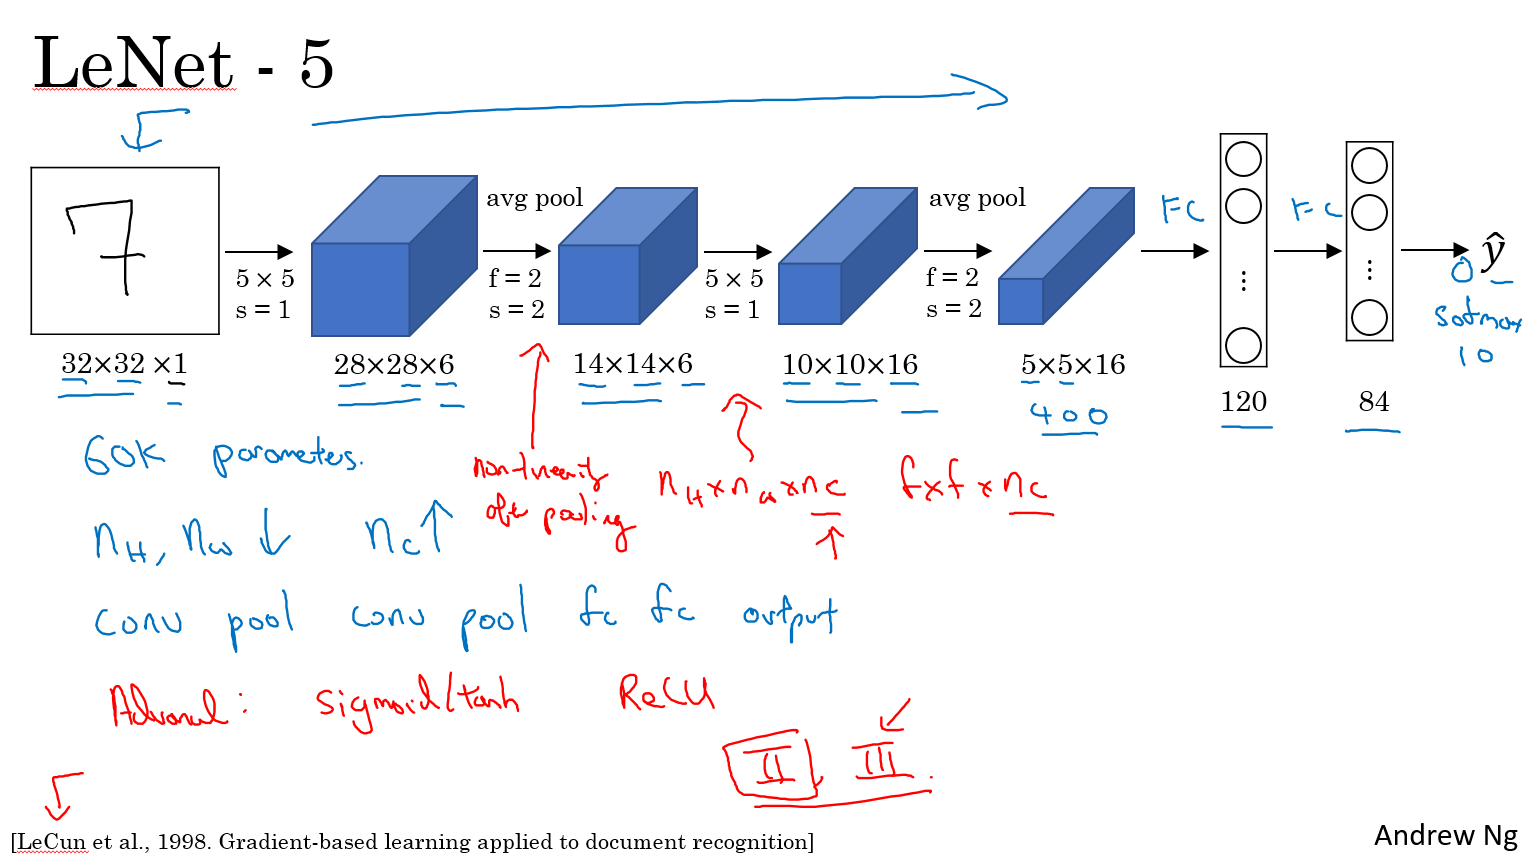

In [43]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [44]:
device = ("cuda" if torch.cuda.is_available() else "cpu")

In [45]:
x= torch.empty(1)

In [46]:
x

tensor([7.0065e-44])

In [47]:
torch.rand(2,3)

tensor([[0.8891, 0.1286, 0.9945],
        [0.9817, 0.5860, 0.8196]])

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu" )
if torch.cuda.is_available():
  device=torch.device("cuda")
  print(True)
else:
  print(False)

x = torch.rand(2,2,device=device)
x

False


tensor([[0.3334, 0.7912],
        [0.7640, 0.4045]])

In [49]:
x = torch.tensor(1)
w = torch.tensor(1.0,requires_grad=True)
y = torch.tensor(2)

In [50]:
y_hat = x*w
s = y_hat - y
loss = s**2
loss

tensor(1., grad_fn=<PowBackward0>)

In [51]:
loss.backward()
w.grad

tensor(-2.)

In [52]:
# linear regression
X = torch.tensor([[1],[2],[3],[4],[5],[6],[7]],dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8],[10],[12],[14]],dtype=torch.float32)

n_samples, n_features = X.shape
n_samples, n_features

(7, 1)

In [53]:
model = nn.Linear(n_features,n_features)
x_test = torch.tensor([5],dtype=torch.float32)
print(f"{model(x_test).item():.3f}")

0.229


In [54]:
iter=100
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

for epoch in range(iter):
  # forward
  y_pred = model(X)
  # loss
  l = loss(Y,y_pred)
  # backprop
  l.backward()
  #update
  optimizer.step()
  #zero grad
  optimizer.zero_grad()
  if epoch % (iter/10) ==0:
    [w,b] =model.parameters()
    print(f"epoch {epoch+1}, w ={w.item():.2f}, loss ={l:.3}")
print(f"f(5) ={model(x_test).item():.3f}")

epoch 1, w =0.69, loss =76.5
epoch 11, w =1.79, loss =0.212
epoch 21, w =1.80, loss =0.195
epoch 31, w =1.81, loss =0.181
epoch 41, w =1.82, loss =0.167
epoch 51, w =1.82, loss =0.155
epoch 61, w =1.83, loss =0.143
epoch 71, w =1.84, loss =0.133
epoch 81, w =1.84, loss =0.123
epoch 91, w =1.85, loss =0.114
f(5) =9.993


# Loading FashionMNIST Data

In [55]:
transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor()
])
train_set = datasets.FashionMNIST('DATA_MNIST/',download=True,train=True,transform=transform)
test_set  = datasets.FashionMNIST('DATA_MNIST/',download=True,train=False,transform=transform)


# Fashion DataLoaders

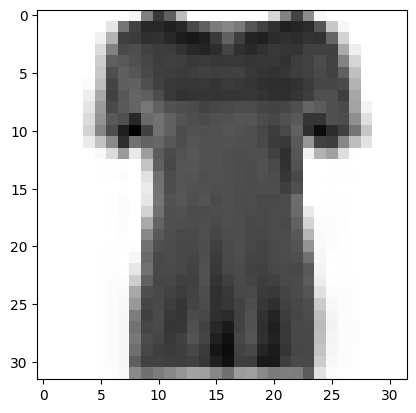

In [56]:
plt.imshow(train_set[10][0].view(32,32,1),cmap=plt.cm.gray_r)

In [90]:
train_set[0][0].shape

torch.Size([1, 32, 32])

In [58]:
fashion_trainLoader = torch.utils.data.DataLoader(train_set,batch_size=64,shuffle=True)
fashion_testLoader = torch.utils.data.DataLoader(test_set,batch_size=64,shuffle=True)


#LeNet Architecture

In [59]:
class LeNet5(nn.Module):

    def __init__(self):
        super(LeNet5, self).__init__()

        self.convolutional_layer = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh()
        )

        self.linear_layer = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10),
        )


    def forward(self, x):
        x = self.convolutional_layer(x)
        x = torch.flatten(x, 1)
        x = self.linear_layer(x)
        x = F.softmax(x, dim=1)
        return x

In [60]:
model = model = LeNet5().to(device)
print(model)

LeNet5(
  (convolutional_layer): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
  )
  (linear_layer): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Tanh()
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [61]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [62]:
def train(trainLoader,valLoader,epochs =20):
  train_loss, val_loss = [], []

  for epoch in range(epochs):

      total_train_loss = 0
      total_val_loss = 0

      model.train()

      # training our model
      for i, (image, label) in enumerate(trainLoader):

          image, label = image.to(device), label.to(device)
          optimizer.zero_grad()
          pred = model(image)

          loss = criterion(pred, label)
          total_train_loss += loss.item()

          loss.backward()
          optimizer.step()

      total_train_loss = total_train_loss / (len(trainLoader) + 1)
      train_loss.append(total_train_loss)

      # validating our model
      model.eval()
      total = 0
      for i, (image, label) in enumerate(valLoader):
          image, label = image.to(device), label.to(device)
          pred = model(image)
          loss = criterion(pred, label)
          total_val_loss += loss.item()

          pred = torch.nn.functional.softmax(pred, dim=1)
          for i, p in enumerate(pred):
              if label[i] == torch.max(p.data, 0)[1]:
                  total = total + 1

      accuracy = total / len(test_set)

      total_val_loss = total_val_loss / (len(valLoader) + 1)
      val_loss.append(total_val_loss)

      if epoch % 5 == 0:
        print('\nEpoch: {}/{}, Train Loss: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}'.format(epoch, epochs, total_train_loss, total_val_loss, accuracy))

  return train_loss, val_loss


# Training the model

In [63]:

train_loss, val_loss = train(fashion_trainLoader,fashion_testLoader,epochs =5)



Epoch: 0/5, Train Loss: 1.7362, Val Loss: 1.6631, Val Acc: 0.7955


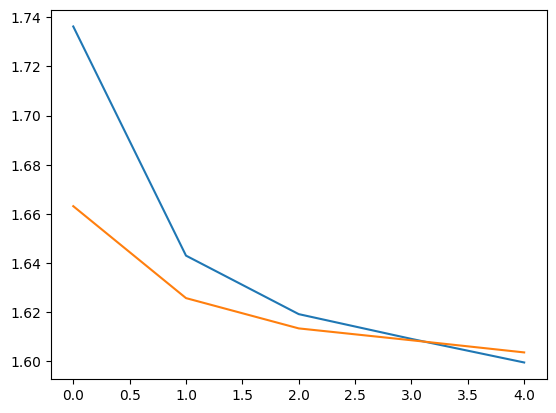

In [64]:
plt.plot(train_loss)
plt.plot(val_loss)


In [65]:
train_set[5][0].view((32,32))


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [66]:
transform = transforms.Compose([
          transforms.Resize((32, 32)),
          transforms.ToTensor()
          ])

train_set = datasets.FashionMNIST('DATA_MNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.FashionMNIST('DATA_MNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

train_data_size = len(train_set)
test_data_size = len(test_set)

In [67]:
training_data = enumerate(trainloader)
batch_idx, (images, labels) = next(training_data)
print(images.shape) # Size of the image
print(labels.shape) # Size of the labels

torch.Size([64, 1, 32, 32])
torch.Size([64])


In [68]:
training_data = enumerate(trainloader)
batch_idx, (images, labels) = next(training_data)
print(images.shape)
with torch.no_grad():
  preds = model(images)

images_np = [i.mean(dim=0).numpy() for i in images]

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


torch.Size([64, 1, 32, 32])


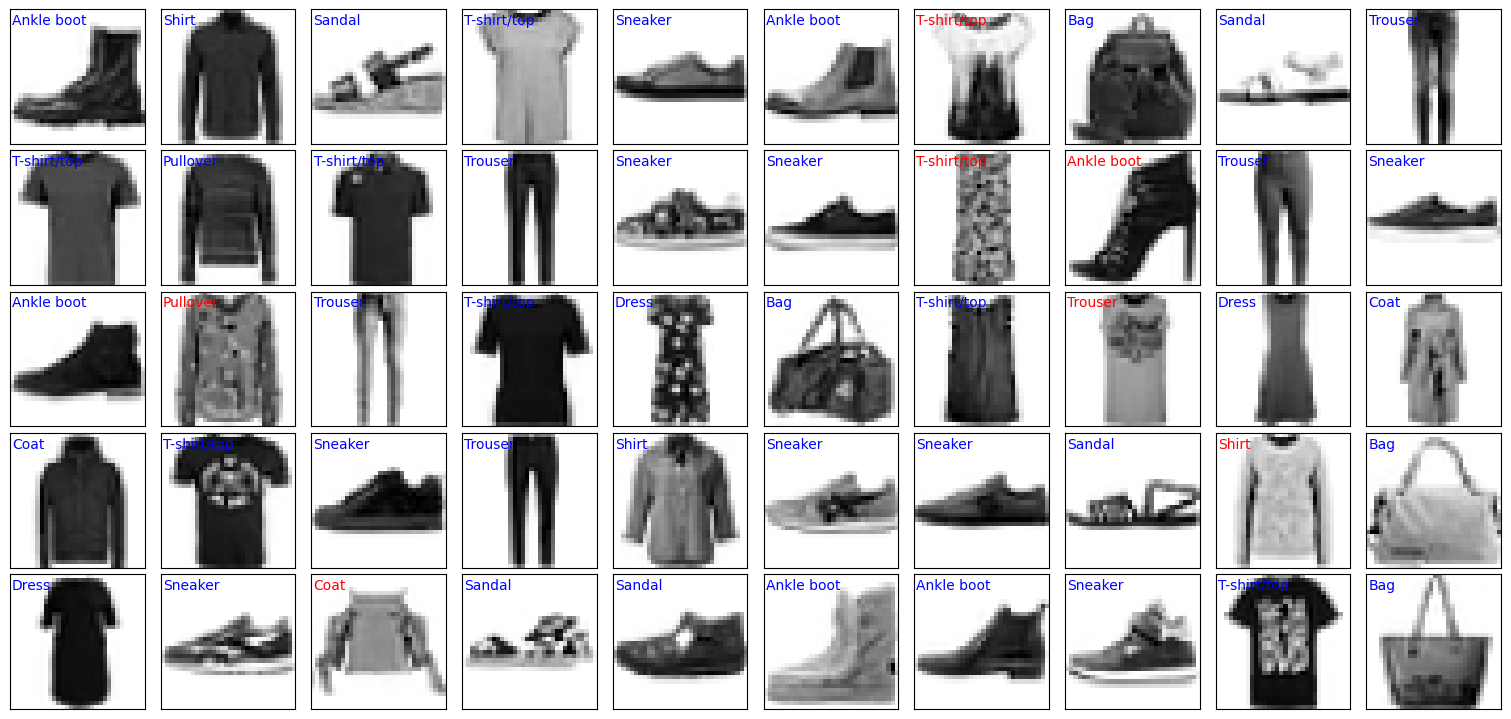

In [69]:
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(images_np[i], cmap=plt.cm.gray_r, interpolation='nearest')

    if labels[i] == torch.max(preds[i], 0)[1]:
      ax.text(0, 3, class_names[torch.max(preds[i], 0)[1]], color='blue')
    else:
      ax.text(0, 3, class_names[torch.max(preds[i], 0)[1]], color='red')

# Handwritten Digits MNIST

In [84]:
transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor()
])
my_train_set = datasets.MNIST('data',download=True,train=True,transform=transform)
my_test_set  = datasets.MNIST('data',download=True,train=False,transform=transform)

my_digits_trainLoader = torch.utils.data.DataLoader(my_train_set,batch_size=64,shuffle=True)
my_digits_testLoader = torch.utils.data.DataLoader(my_test_set,batch_size=64,shuffle=True)


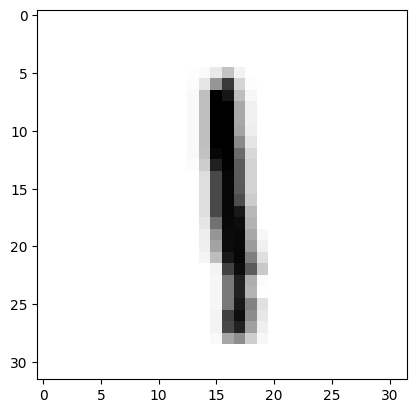

In [76]:
plt.imshow(my_train_set[8][0].view(32,32,1),cmap=plt.cm.gray_r,)

In [78]:
model = LeNet5().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_loss, val_loss = train(my_digits_trainLoader,my_digits_testLoader,epochs =20)



Epoch: 0/20, Train Loss: 1.5832, Val Loss: 1.4991, Val Acc: 0.9569

Epoch: 5/20, Train Loss: 1.4758, Val Loss: 1.4705, Val Acc: 0.9820

Epoch: 10/20, Train Loss: 1.4701, Val Loss: 1.4673, Val Acc: 0.9849

Epoch: 15/20, Train Loss: 1.4672, Val Loss: 1.4661, Val Acc: 0.9865


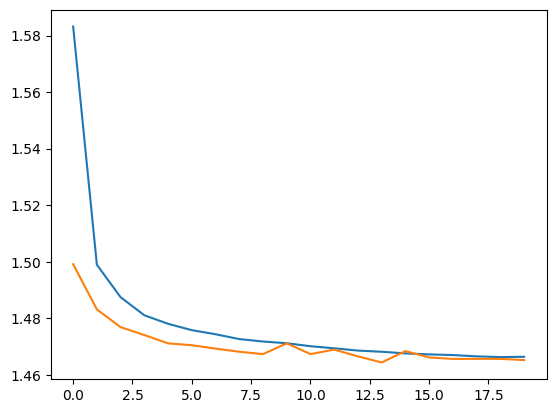

In [79]:
plt.plot(train_loss)
plt.plot(val_loss)

In [74]:
# torch.max(preds[i],-1)

In [82]:
# testiter = iter(my_digits_testLoader)
# images, labels = next(testiter)

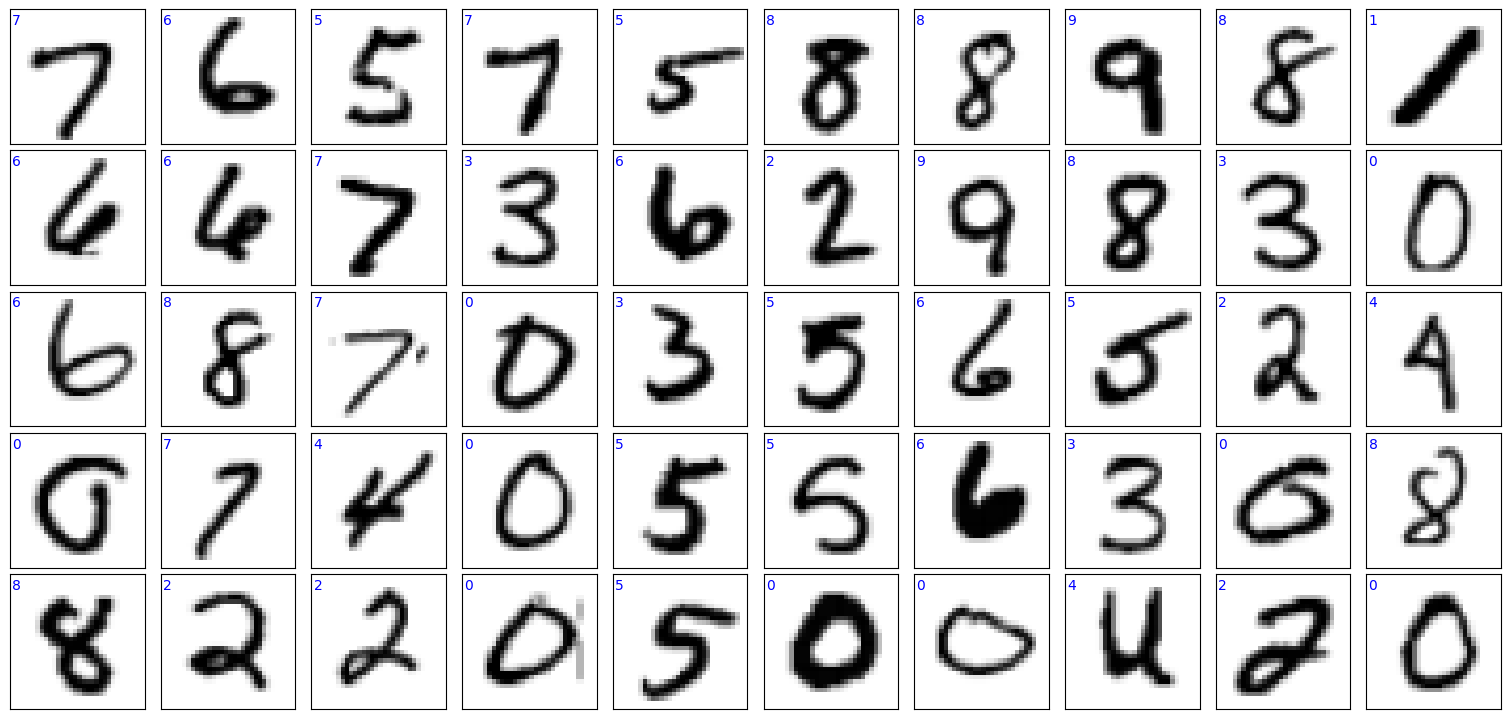

In [80]:
# testiter = iter(my_digits_testLoader)
# images, labels = next(testiter)
training_data = enumerate(my_digits_trainLoader)
batch_idx, (images, labels) = next(training_data)

with torch.no_grad():
  preds = model(images)

images_np = [i.mean(dim=0).numpy() for i in images]


fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(images_np[i], cmap=plt.cm.gray_r, interpolation='nearest')

    if labels[i] == torch.max(preds[i], 0)[1]:
      ax.text(0, 3, torch.max(preds[i], 0)[1].item(), color='blue')
    else:
      ax.text(0, 3, torch.max(preds[i], 0)[1].item(), color='red')
